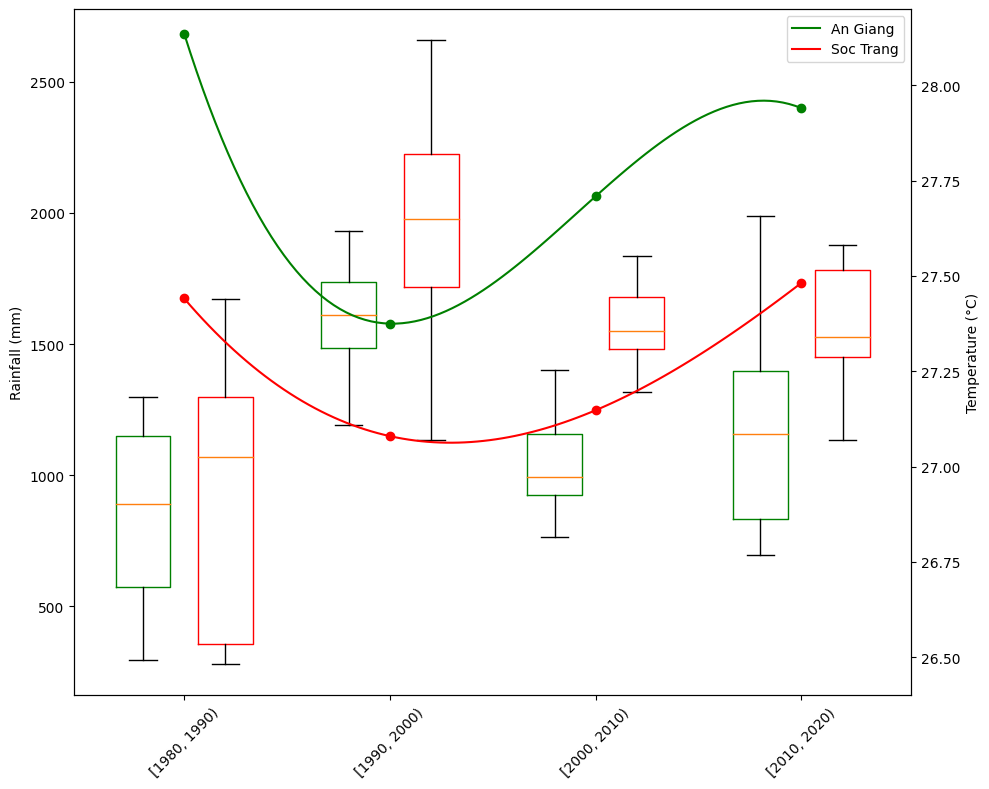

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Đọc dữ liệu từ tệp Excel
df = pd.read_excel("data_guita.xlsx")

# Tạo cột 'year_group' để nhóm theo từng nhóm 5 năm
df['year_group'] = pd.cut(df[df['year'] <= 2021]['year'], bins=range(1980, 2022, 10), right=False)

# Xóa các dòng chứa giá trị NaN trong cột 'year_group'
df = df.dropna(subset=['year_group'])

# Tạo hình boxplot và đường
fig, ax = plt.subplots(figsize=(10, 8))
ax2 = ax.twinx()

# Tạo danh sách lượng mưa của từng nhóm
rainfall_rfag = [df[(df['year_group'] == group) & (df['year'] <= 2021)]['rfag'].values for group in df['year_group'].unique()]
rainfall_rfst = [df[(df['year_group'] == group) & (df['year'] <= 2021)]['rfst'].values for group in df['year_group'].unique()]

# Tạo danh sách nhiệt độ của từng nhóm
temperature_temag = [df[(df['year_group'] == group) & (df['year'] <= 2021)]['temag'].values for group in df['year_group'].unique()]
temperature_temst = [df[(df['year_group'] == group) & (df['year'] <= 2021)]['temst'].values for group in df['year_group'].unique()]

# Vẽ boxplot
positions_rfag = np.array(range(len(rainfall_rfag))) * 1.5 - 0.3
positions_rfst = np.array(range(len(rainfall_rfst))) * 1.5 + 0.3

box_rfag = ax.boxplot(rainfall_rfag, positions=positions_rfag, sym='', widths=0.4)
box_rfst = ax.boxplot(rainfall_rfst, positions=positions_rfst, sym='', widths=0.4)

for box in box_rfag['boxes']:
    box.set(color='green')
for box in box_rfst['boxes']:
    box.set(color='red')

# Vẽ đường
positions_temag = np.array(range(len(temperature_temag))) * 1.5 
positions_temst = np.array(range(len(temperature_temst))) * 1.5

#line_temag = ax2.plot(positions_temag, [np.mean(tem) for tem in temperature_temag], '-o', color='green', label='temag')
#line_temst = ax2.plot(positions_temst, [np.mean(tem) for tem in temperature_temst], '-o', color='red', label='temst')
from scipy.interpolate import make_interp_spline

# Smooth line plot for temag
spline_temag = make_interp_spline(positions_temag, [np.mean(tem) for tem in temperature_temag])
positions_temag_smooth = np.linspace(min(positions_temag), max(positions_temag), 100)
temag_smooth = spline_temag(positions_temag_smooth)
line_temag = ax2.plot(positions_temag_smooth, temag_smooth, color='green', label='temag')

# Add data nodes to temag line plot
ax2.plot(positions_temag, [np.mean(tem) for tem in temperature_temag], 'o', color='green')

# Smooth line plot for temst
spline_temst = make_interp_spline(positions_temst, [np.mean(tem) for tem in temperature_temst])
positions_temst_smooth = np.linspace(min(positions_temst), max(positions_temst), 100)
temst_smooth = spline_temst(positions_temst_smooth)
line_temst = ax2.plot(positions_temst_smooth, temst_smooth, color='red', label='temst')

# Add data nodes to temst line plot
ax2.plot(positions_temst, [np.mean(tem) for tem in temperature_temst], 'o', color='red')


# Đặt nhãn và tiêu đề cho trục x
ax.set_xticks((positions_rfag + positions_rfst) / 2)
ax.set_xticklabels(df[df['year'] <= 2021]['year_group'].unique(), rotation=45)

# Đặt nhãn cho trục y
ax.set_ylabel('Rainfall (mm)')
ax2.set_ylabel('Temperature (°C)')

# Tạo legend cho biểu đồ
box_rfag = plt.Line2D([], [], color='green', label='An Giang')
box_rfst = plt.Line2D([], [], color='red', label='Soc Trang')

plt.legend(handles=[box_rfag, box_rfst])

# Đặt giới hạn trục y cho đồ thị dạng line
ax2.set_ylim(26.4, 28.2)

plt.tight_layout()

# Lưu đồ thị thành file PDF
plt.savefig('graph.pdf', dpi=300, format='pdf')

plt.show()
